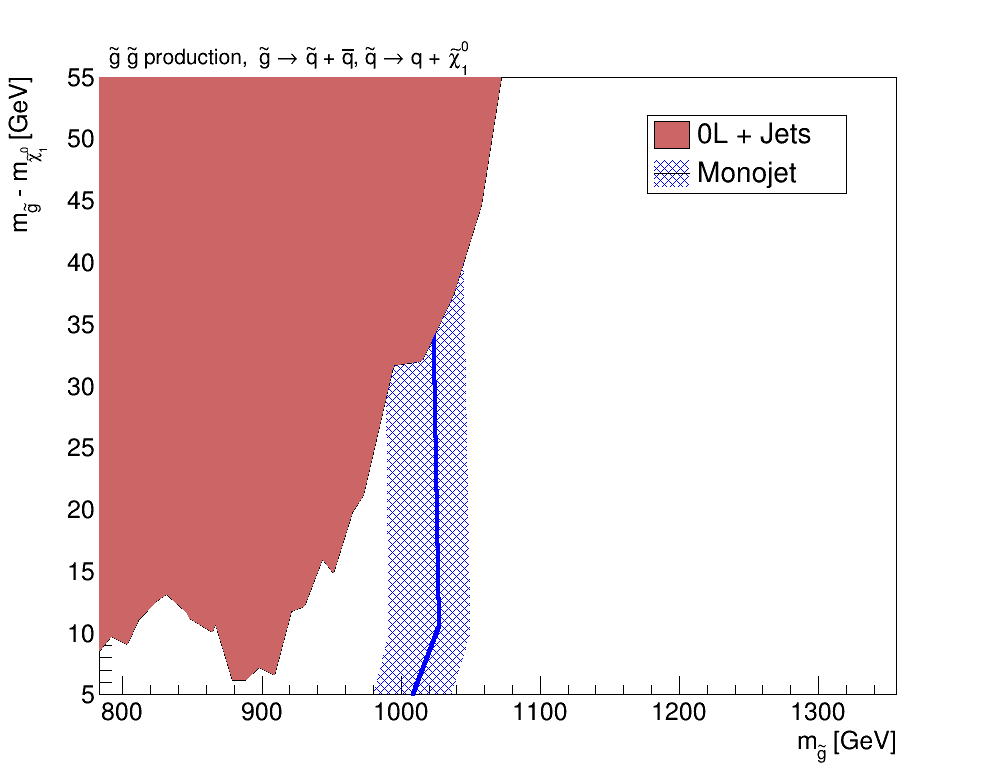

In [25]:
import numpy as np
import pandas as pd
import ROOT
import ctypes

# Data from the file
data_0L = pd.read_csv("contours/HEPData-ins1827025-v2-Obs.Contour_3.csv", skiprows=8)
gluino_mass_0L = data_0L['M(Gluino) [GeV]'].values
neutralino_mass_0L = data_0L['M(LSP) [GeV]'].values

mass_difference_0L = gluino_mass_0L - neutralino_mass_0L
#(995,990,950)
neutralino_mass_monojet = np.array([1004, 1017, 971.0])
gluino_mass_monojet = np.array([1009, 1027.5, 1021.0])

mass_difference_monojet = gluino_mass_monojet - neutralino_mass_monojet

### Uncertainties

lower_neutralino_mass_monojet = np.array([974.8, 981.2, 937.3 ])
lower_gluino_mass_monojet = np.array([979.8, 991.2, 987.3 ])

lower_mass_difference_monojet = lower_gluino_mass_monojet - lower_neutralino_mass_monojet

upper_neutralino_mass_monojet = np.array([1031.2, 1039.7, 993.7 ])
upper_gluino_mass_monojet = np.array([1036.2, 1049.7, 1043.7 ])

upper_mass_difference_monojet = upper_gluino_mass_monojet - upper_neutralino_mass_monojet

graph_0L = ROOT.TGraph(len(gluino_mass_0L), gluino_mass_0L, mass_difference_0L)
graph_monojet = ROOT.TGraph(len(gluino_mass_monojet), gluino_mass_monojet, mass_difference_monojet)
graph_monojet_lower = ROOT.TGraph(len(lower_gluino_mass_monojet), lower_gluino_mass_monojet, lower_mass_difference_monojet)
graph_monojet_upper = ROOT.TGraph(len(upper_gluino_mass_monojet), upper_gluino_mass_monojet, upper_mass_difference_monojet)

# Create a new canvas and del previous if existing
existing_canvas = ROOT.gROOT.FindObject("canvas")
if existing_canvas:
    existing_canvas.IsA().Destructor(existing_canvas)

canvas = ROOT.TCanvas("canvas", "", 1000, 800)
canvas.cd()

graph_0L.SetFillColor(ROOT.kRed -6)
graph_0L.Draw("AL")

# Create a function to fill the area between curves
def FillBetweenCurves(graph_lower, graph_upper):
    n = graph_lower.GetN()
    x_lower = graph_lower.GetX()
    y_lower = graph_lower.GetY()
    x_upper = graph_upper.GetX()
    y_upper = graph_upper.GetY()
    fill_graph = ROOT.TGraph(2 * n)
    for i in range(n):
        fill_graph.SetPoint(i, x_lower[i], y_lower[i])
        fill_graph.SetPoint(n + i, x_upper[n - 1 - i], y_upper[n - 1 - i])
    fill_graph.SetFillStyle(3013)
    fill_graph.SetFillColor(ROOT.kBlue)
    fill_graph.Draw("F")
    return fill_graph

fill_graph = FillBetweenCurves(graph_monojet_lower, graph_monojet_upper)

graph_monojet.SetLineColor(ROOT.kBlue)
graph_monojet.SetLineWidth(4)
graph_monojet.Draw("LSAME")

graph_0L.Draw("FSAME")

text = ROOT.TLatex(790, 56, "#tilde{g} #tilde{g} production, #tilde{g} #rightarrow #tilde{q} + #bar{q}, #tilde{q} #rightarrow q + #tilde{#chi}_{1}^{0}")
text.SetTextFont(42)
text.SetTextSize(0.03)
text.SetTextAlign(11)
text.Draw()

graph_0L.GetXaxis().SetTitle("m_{#tilde{g}} [GeV]")
graph_0L.GetYaxis().SetTitle("m_{#tilde{g}} - m_{#tilde{#chi}_{1}^{0}} [GeV]")
# graph_0L.GetXaxis().CenterTitle()
# graph_0L.GetYaxis().CenterTitle()
graph_0L.SetTitle("")

graph_0L.GetYaxis().SetTitleOffset(1.3)
graph_0L.GetXaxis().SetTitleOffset(1.2)

graph_0L.GetXaxis().SetRangeUser(790, 1350)
graph_0L.GetYaxis().SetRangeUser(5, 55)

legend = ROOT.TLegend(0.65, 0.75, 0.85, 0.85)
legend.SetTextSize(0.04)
legend.AddEntry(graph_0L, "0L + Jets", "F")
legend.AddEntry(fill_graph, "Monojet", "LF")
legend.Draw()

canvas.Draw()
